In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

from samcc.bundleClass import bundleClass
from samcc.wrappers import run_dssp
from samcc.wrappers import run_socket
from samcc.socket_parser import parse_socket_output
from samcc.socketClass import socket_class

### Before you start please take a look at our <a href="https://academic.oup.com/bioinformatics/article/36/22-23/5368/6039120" target="_blank">paper</a> and get acquainted with the following terms:

* Knobs-into-holes packing
* Heptad repeat
* Bundle periodicity vs. helical periodicity
* Bundle layers




### Let's analyse <a href="https://www.rcsb.org/structure/3tsi" target="_blank">this</a> structure!


![](./example_in/3tsi_view.png)




In [2]:
pdbpath='./example_in/3tsi.pdb'

dssp_binary = '/opt/apps/dssp-2.3.0/mkdssp' # do not use newer version!
socket_binary = '/opt/apps/socket/socket'

In [3]:
# predict secondary structure with DSSP
dssppath = run_dssp(pdbpath, dssp_binary)

# predict coiled-coil regions with SOCKET
socketpath = run_socket(pdbpath, dssppath, socket_binary)

# parse SOCKET data
socket_data = parse_socket_output(socketpath)
s = socket_class(socket_data, pdbpath)

# remove temporary files
os.remove(dssppath)
os.remove(socketpath)

In [4]:
# raw SOCKET data suggests that this structure contains two coiled-coil domains
len(socket_data)

2

In [5]:
# define a bundle object for each detected domain
bundles = s.get_bundles(res_num_layer_detection=5, distance_threshold='auto', search_layer_setting_num=9) 

In [6]:
# bundle object provides various measurment methods 
bundle_dfs = {}

for bundle in bundles: 
    bundle.calc_bundleaxis() # define bundle axis
    bundle.calc_radius() # define bundle radius
    bundle.calc_periodicity() # define helical and bundle periodicity
    bundle_dfs[bundle.socket_cc_id] = bundle.gendf() # export a pandas dataframe with all the data
    
print(f'{list(bundle_dfs.keys())} bundles detected...') 

['10', '11'] bundles detected...


In [7]:
# now, let's take a look at the two domains
# P, and p denote bundle and helical periodicity, respectively
bundle_dfs['10']

res_name  res_number chain_name  chain_ap    radius         P  \
layer chain                                                                 
0     0          ILE          61          A     False       NaN       NaN   
      1          ILE          61          B     False       NaN       NaN   
      2          ILE          61          C     False       NaN       NaN   
      3          ILE          61          D     False       NaN       NaN   
1     0          THR          62          A     False  7.036590  3.571958   
      1          THR          62          B     False  7.738209  3.538782   
      2          THR          62          C     False  8.067684  3.516832   
      3          THR          62          D     False  7.667452  3.562139   
2     0          ASP          63          A     False  6.960430  3.567233   
      1          ASP          63          B     False  7.578200  3.538318   
      2          ASP          63          C     False  7.917295  3.514318   
      3          ASP          63          D     False  7.493927  3.567301   
3     0          LEU          64          A     False  7.027660  3.548049   
      1          LEU          64          B     False  7.434930  3.535288   
      2          LEU          64          C     False  7.723458  3.515569   
      3          LEU          64          D     False  7.441125  3.560884   
4     0          LEU          65          A     False  6.979624  3.538554   
      1          LEU          65          B     False  7.348637  3.533707   
      2          LEU          65          C     False  7.572345  3.521251   
      3          LEU          65          D     False  7.331884  3.544873   
5     0          ASN          66          A     False  6.981897  3.535228   
      1          ASN          66          B     False  7.222234  3.534190   
      2          ASN          66          C     False  7.453273  3.515992   
      3          ASN          66          D     False  7.284371  3.533471   
6     0          ASN          67          A     False  6.970837  3.525327   
      1          ASN          67          B     False  7.107838  3.532816   
      2          ASN          67          C     False  7.336192  3.513986   
      3          ASN          67          D     False  7.177512  3.536031   
7     0          ILE          68          A     False  6.959516  3.521887   
      1          ILE          68          B     False  7.085469  3.524167   
      2          ILE          68          C     False  7.232128  3.513896   
      3          ILE          68          D     False  7.116015  3.531873   
8     0          LEU          69          A     False  6.966346  3.519830   
      1          LEU          69          B     False  7.059060  3.515143   
      2          LEU          69          C     False  7.209570  3.504348   
      3          LEU          69          D     False  7.094555  3.522417   
9     0          SER          70          A     False  6.955199  3.512679   
      1          SER          70          B     False  7.022403  3.506439   
      2          SER          70          C     False  7.144721  3.498985   
      3          SER          70          D     False  7.032019  3.524853   
10    0          VAL          71          A     False  7.011739  3.505912   
      1          VAL          71          B     False  7.045562  3.499052   
      2          VAL          71          C     False  7.106508  3.497931   
      3          VAL          71          D     False  7.085141  3.523177   
11    0          ALA          72          A     False       NaN       NaN   
      1          ALA          72          B     False       NaN       NaN   
      2          ALA          72          C     False       NaN       NaN   
      3          ALA          72          D     False       NaN       NaN   

                    p  
layer chain            
0     0           NaN  
      1           NaN  
      2           NaN  
      3           NaN  
1     0      3.65

In [8]:
bundle_dfs['11']

res_name  res_number chain_name  chain_ap    radius         P  \
layer chain                                                                 
0     0          LEU          83          A     False       NaN       NaN   
      1          LEU          83          B     False       NaN       NaN   
      2          LEU          83          C     False       NaN       NaN   
      3          LEU          83          D     False       NaN       NaN   
1     0          PRO          84          A     False  7.722204  3.649544   
      1          PRO          84          B     False  7.741549  3.654085   
      2          PRO          84          C     False  7.900789  3.644428   
      3          PRO          84          D     False  7.737620  3.657901   
2     0          LEU          85          A     False  7.676671  3.640626   
      1          LEU          85          B     False  7.763567  3.659496   
      2          LEU          85          C     False  7.891293  3.647823   
      3          LEU          85          D     False  7.655243  3.642792   
3     0          GLN          86          A     False  7.702822  3.635028   
      1          GLN          86          B     False  7.764489  3.662547   
      2          GLN          86          C     False  7.905324  3.651146   
      3          GLN          86          D     False  7.633406  3.631901   
4     0          LEU          87          A     False  7.701939  3.639101   
      1          LEU          87          B     False  7.787281  3.662848   
      2          LEU          87          C     False  7.934494  3.650698   
      3          LEU          87          D     False  7.599870  3.643559   
5     0          ASP          88          A     False  7.716392  3.638150   
      1          ASP          88          B     False  7.796716  3.657196   
      2          ASP          88          C     False  7.900749  3.655130   
      3          ASP          88          D     False  7.558544  3.644225   
6     0          THR          89          A     False  7.681119  3.644050   
      1          THR          89          B     False  7.788975  3.648330   
      2          THR          89          C     False  7.890719  3.649954   
      3          THR          89          D     False  7.565168  3.647419   
7     0          LEU          90          A     False  7.604975  3.655490   
      1          LEU          90          B     False  7.743872  3.647420   
      2          LEU          90          C     False  7.822314  3.657222   
      3          LEU          90          D     False  7.461780  3.665765   
8     0          GLU          91          A     False  7.576451  3.654418   
      1          GLU          91          B     False  7.661929  3.653039   
      2          GLU          91          C     False  7.692617  3.677681   
      3          GLU          91          D     False  7.531798  3.660383   
9     0          SER          92          A     False  7.474844  3.668310   
      1          SER          92          B     False  7.587125  3.660643   
      2          SER          92          C     False  7.632944  3.671030   
      3          SER          92          D     False  7.506989  3.658281   
10    0          THR          93          A     False  7.402265  3.687230   
      1          THR          93          B     False  7.500638  3.662270   
      2          THR          93          C     False  7.604820  3.661331   
      3          THR          93          D     False  7.432345  3.669773   
11    0          LEU          94          A     False       NaN       NaN   
      1          LEU          94          B     False       NaN       NaN   
      2          LEU          94          C     False       NaN       NaN   
      3          LEU          94          D     False       NaN       NaN   

                    p  
layer chain            
0     0           NaN  
      1           NaN  
      2           NaN  
      3           NaN  
1     0      3.54

The first domain spans residues 61-72, whereas the second 83-94, but what's is happening between them?

Once we know domain boundaries and layers, we can force SamCC-Turbo to measure also the missing part (i.e, to measure the whole region as it is were a single coiled coil).


In [9]:
bundle = bundleClass()

# we use defdata to define boundaries of this big domain
defdata = [[range(61, 101), range(61, 101), range(61, 101), range(61, 101)], # residue ranges
           ['A', 'B', 'C', 'D'], # pdb chains
           [False, False, False, False], # no anti-parallel helices
           ['x', 'x', 'x', 'x']] # no hepatd register definition

bundle.from_defdata(pdbpath, *defdata)

In [15]:
# now, we do measurments for the whole region
bundle.calc_bundleaxis() 
bundle.calc_radius() 
bundle.calc_periodicity() 
big_bundle_df = bundle.gendf() 

<AxesSubplot:xlabel='layer'>

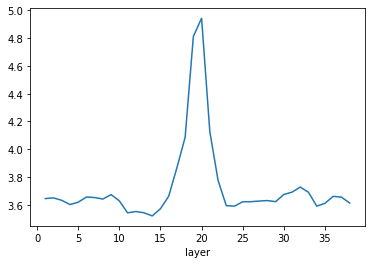

In [16]:
# ... and the plot the helical periodicity (averaged per layer)
p_mean = big_bundle_df.p.mean(level=0)
p_mean.plot()

The helices of the two coiled-coil segments adopt a canonical periodicity of ~3.63 residues / turn. However, in the linker region helical periodicity increases to almost 5 residues / turm, a value characteristic for pi-helices. That's the reason why it was not detected by SOCKET (presumably due to the lack of knobs-int-holes interacions).

In [17]:
print (f'helical periodicity of bundle #1 {p_mean[:17].mean().round(2)} res/turn -> alpha helix')
print (f'helical periodicity of bundle #2 {p_mean[23:].mean().round(2)} res/turn -> alpha helix')
print (f'\nhelical periodicity of the linker {p_mean[17:23].mean().round(2)} res/turn -> pi helix')

helical periodicity of bundle #1 3.61 res/turn -> alpha helix
helical periodicity of bundle #2 3.64 res/turn -> alpha helix

helical periodicity of the linker 4.27 res/turn -> pi helix


Take a look on the structure again to find the pi-helical linker: <a href="https://www.rcsb.org/3d-view/3TSI" target="_blank">3D view at PDB</a>



<AxesSubplot:xlabel='layer'>

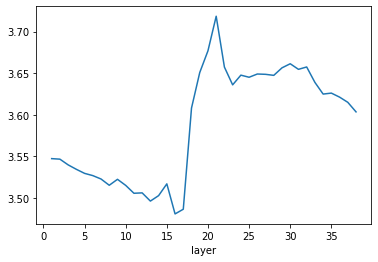

In [13]:
# let's investigate the periodicity of the bundle (i.e., supercoiling of the helices)
P_mean = big_bundle_df.P.mean(level=0)
P_mean.plot()

In [14]:
print (f'periodicity of bundle #1 {P_mean[:17].mean().round(2)} res/turn -> canonical 7/2 coiled coil')
print (f'periodicity of bundle #2 {P_mean[23:].mean().round(2)} res/turn -> non-canonical 11/3 coiled coil')

periodicity of bundle #1 3.52 res/turn -> canonical 7/2 coiled coil
periodicity of bundle #2 3.64 res/turn -> non-canonical 11/3 coiled coil


As we can see this structure comprises two coiled-coil regions of different periodicity. The first N-terminal domain is a canonical left-handed coiled-coil (7/2=3.5 periodicity), whereas in the second C-terminal, the helices are straight and display only a subtle right-handed supercoiling (the difference between bundle periodicity, 3.64, and the periodicity of a regular alpha helix, 3.63, is very small).